# Gene regulation

The expression of genes is tightly regulated in space and time. 
 * Transcription factors: proteins that bind to DNA and enhance or suppress expression
 * Sigma factors (transcription initiation)
 * Chromatin state: the genome can be packaged away and silenced
 * DNA modifications: methylation, histone marks
 * Protein modifications, dimerizations, etc

The molecular biology of these process is very complicated and we will focus here on general aspects of the problem.

### Typical cartoon of gene regulation

![gene_regulation](figures/trp_operon_libretexts.jpg)

source: [bio.libretexts.org/Introductory_and_General_Biology](https://bio.libretexts.org/Bookshelves/Introductory_and_General_Biology/General_Biology_1e_(OpenStax)/3%3A_Genetics/16%3A_Gene_Expression/16.2%3A_Prokaryotic_Gene_Regulation)

### Uniqueness of binding site

In a random string of ACGT of length one million, every 10-mer of bases will occur once on average. 
10 bases is also the length of one turn of the DNA double helix and a transcription factor can meaningfully interact with about that many base pairs. 
Hence transcription factor binding in bacteria is approximately unique. 
This is reflected in the typical architecture where one, two, or sometimes three transcription factors regulate a gene or operon. 

In eurkaryotes with 1000-fold larger genomes, TF binding is rarely unique. Instead, regulation is combinatorial with many layers contributing. 

In [1]:
# Bacterium
print("\n\nBacterium\n")
L = 5e6
for k in range(2,13):
    print(f"number specific of {k}-mers in a genome of length {L}: {L/4**k:1.2f}")
    
# human
print("\n\nHuman\n")
L = 3e9
for k in range(2,24,2):
    print(f"number specific of {k}-mers in a genome of length {L}: {L/4**k:1.2f}")




Bacterium

number specific of 2-mers in a genome of length 5000000.0: 312500.00
number specific of 3-mers in a genome of length 5000000.0: 78125.00
number specific of 4-mers in a genome of length 5000000.0: 19531.25
number specific of 5-mers in a genome of length 5000000.0: 4882.81
number specific of 6-mers in a genome of length 5000000.0: 1220.70
number specific of 7-mers in a genome of length 5000000.0: 305.18
number specific of 8-mers in a genome of length 5000000.0: 76.29
number specific of 9-mers in a genome of length 5000000.0: 19.07
number specific of 10-mers in a genome of length 5000000.0: 4.77
number specific of 11-mers in a genome of length 5000000.0: 1.19
number specific of 12-mers in a genome of length 5000000.0: 0.30


Human

number specific of 2-mers in a genome of length 3000000000.0: 187500000.00
number specific of 4-mers in a genome of length 3000000000.0: 11718750.00
number specific of 6-mers in a genome of length 3000000000.0: 732421.88
number specific of 8-mers i

## Number of unique k-mers in the E. coli genome

The file `ecoli_genome.fasta` contains the genome of the common laboratory strain K12 (MG1655). The following code will load this text file and determine the number of unique k-mers (words of length k). The file in in `fasta` format, meaning it is of the form:
```
>NZ_LR881938.1 Escherichia coli str. K-12 substr. MG1655 strain K-12 chromosome MG1655, complete sequence
AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGC
TTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAA
TATAGGCATAGCGCACAGACAGATAAAAATTACAGAGTACACAACATCCATGAAACGCATTAGCACCACC
....
```
The first line is called `header` and gives the name of the strain. This is follwed by the genome, which is broken into many lines. 

In [1]:
fname = 'ecoli_genome.fasta'  # define the filename
genome_parts = []  # empty list to accumulate the genome in

with open(fname) as input_data:
    for line in input_data:
        if line[0] in 'ACGT': # only take lines that start with ACGT, ignore the header
            genome_parts.append(line.strip())

# concatenate the parts
genome = ''.join(genome_parts)
print('Genome length:', len(genome))
print('first 10 bases:', genome[:10])


Genome length: 4625146
first 10 bases: AGCTTTTCAT


In [19]:
all_kmers = set()
k = 15
# loop over all position from 0 to L-k
for i in range(len(genome)-k):
    all_kmers.add(genome[i:i+k])

print(f"found {len(all_kmers)} out of all possible {4**k}. \nAt most {len(genome)-k} kmer could have been found the genome.")

found 4503887 out of all possible 1073741824. 
At most 4625131 kmer could have been found the genome.


## Let's count kmers

In [20]:
# Let's count how often each kmer occurs
# to count occurrences, we use a dictionary
kmer_counts = {}
k = 15
# loop over all position from 0 to L-k
for i in range(len(genome)-k):
    kmer = genome[i:i+k]
    # if the kmer was already observed, increment the count by one
    if kmer in kmer_counts:
        kmer_counts[kmer] += 1
    else: # otherwise, set the count to 1
        kmer_counts[kmer] = 1




In [21]:
# sort kmers. 
# the function kmer_counts.items() returns a list [(kmer1, count1), (kmer2, count2)...], 
# the remaining arguments tell the function to sort by the count in descending order
sorted_kmers = sorted(kmer_counts.items(), key=lambda x:x[1], reverse=True)
# 10 most abundant kmers
sorted_kmers[:10]

[('ACGCCGCATCCGGCA', 71),
 ('GCCTGATGCGACGCT', 69),
 ('TGCCGGATGCGGCGT', 66),
 ('GTAGGCCGGATAAGG', 61),
 ('AGGCCGGATAAGGCG', 61),
 ('TAGGCCGGATAAGGC', 60),
 ('GGCCGGATAAGGCGT', 58),
 ('GCCGGATAAGGCGTT', 56),
 ('TGCCTGATGCGACGC', 56),
 ('CGCCTTATCCGGCCT', 56)]

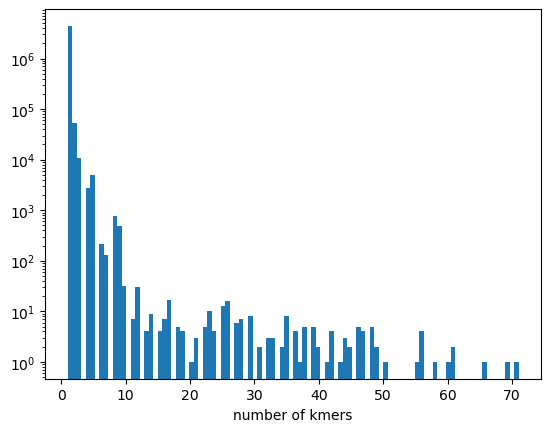

In [22]:
import matplotlib.pyplot as plt
plt.hist([x[1] for x in sorted_kmers], bins=100)
plt.xlabel('kmer count')
plt.xlabel('number of kmers')
plt.yscale('log')